# Game of Life

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
# from os.path import basename, exists

# def download(url):
#     filename = basename(url)
#     if not exists(filename):
#         from urllib.request import urlretrieve
#         local, _ = urlretrieve(url, filename)
#         print('Downloaded ' + local)
    
# download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from utils import savefig
# make a directory for figures
!mkdir -p figs

## Game of Life entities



In [4]:
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/Cell2D.py')

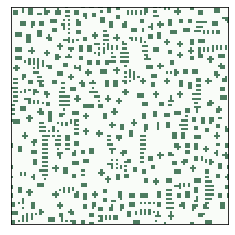

In [14]:
from scipy.signal import correlate2d
from Cell2D import Cell2D

class Life2(Cell2D):
    """Implementation of Martin Skrodzki´s Reaction."""        
    def __init__(self, n):
        self.n = n
        self.array = np.random.randint(2, size=(n, n), dtype=np.uint8)
        
#         self.array = np.zeros((n,n));
#         self.add_cells(10,10, '1111111111', '1111111111', '1111111111')
        
        self.options = dict(mode='same', boundary='wrap')        
        
        self.kernel = -np.ones((5,5))
        self.kernel[1:4, 1:4] = 1
#         self.kernel[2,2] = 0
        
        self.order_kernel = np.zeros((3,3))
        self.order_kernel[(0,1), (1,0)] = 1
        self.order_kernel[(1,2), (2,1)] = 1
        
        self.order_parameter = np.sum(self.array * correlate2d(self.array, self.order_kernel, **self.options)) / (4*self.n**2)
        self.order_list = [self.order_parameter]
    
    def step(self):
        update_rule = correlate2d(self.array, self.kernel, **self.options)
        self.array = (update_rule > 0).astype(np.uint8)         
        
        self.order_parameter = np.sum(self.array * correlate2d(self.array, self.order_kernel, **self.options)) / (4*self.n**2)
        self.order_list.append(self.order_parameter)
                
a = Life2(100)

# a.loop(100)

# print(a.order_list)
# plt.plot(a.order_list)
# plt.show()

a.animate(100, 0.1)

The following function creates a `Life` object and sets the initial condition using strings of `0` and `1` characters.

In [10]:
def make_life(n, m, row, col, *strings):
    """Makes a Life object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.add_cells(row, col, *strings)
    return life